In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
train = pd.read_csv('kaggle/input/digit_recognizer/train.csv')
test = pd.read_csv('kaggle/input/digit_recognizer/test.csv')

In [3]:
y = train['label'].values #store as array

In [4]:
X = train.drop('label', axis=1).values

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.22, random_state = 69)

In [6]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_image(data):
    img = data.reshape(28,28)
    plt.imshow(img, cmap=mpl.cm.binary, interpolation='nearest')
    plt.axis('off')

0

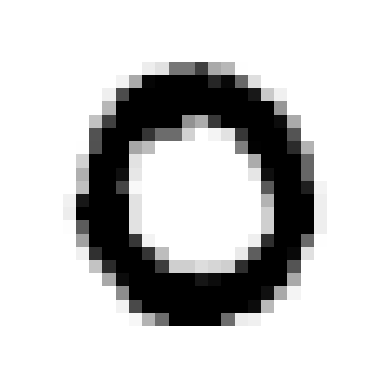

In [7]:
plot_image(X[1])
y[1]

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=4, weights='distance', n_jobs=-1)
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=4, weights='distance')

In [9]:
cross_val_score(knn_clf, x_train, y_train, cv=3, scoring="accuracy")

array([0.96630037, 0.96520147, 0.96410256])

# One Vs Others SVC

from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf.fit(X_train[:1000], y_train[:1000])

In [11]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42), n_jobs=-1)
ovr_clf.fit(x_train, y_train)

OneVsRestClassifier(estimator=SVC(gamma='auto', random_state=42), n_jobs=-1)

In [13]:
from joblib import dump

# Save the model to a file
dump(ovr_clf, 'ovr_clf.joblib')

['ovr_clf.joblib']

In [9]:
from joblib import load

# Load the model from the file
ovr_clf_loaded = load('ovr_clf.joblib')

In [ ]:
cross_val_score(ovr_clf, x_train, y_train, cv=3, scoring="accuracy")

In [10]:
test_data_modified = train.drop('label', axis=1).values

In [11]:
predictions = ovr_clf_loaded.predict(test_data_modified)